# Title: Global plastic usage: future impact awareness

##  EDA, PCA & ML


### Introduction

This report undertakes the identification of critical issues associated with global plastic usage. The pervasive problem of plastic consumption unfolds as a multidimensional crisis demanding immediate attention. With each passing day, the escalating reliance on plastic exacerbates, posing severe consequences for the environment and future generations

## Import Libraries

Imported libraries are assigned abbreviated formats, facilitating faster recall and utilization

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

#### Importing Dataset

In [3]:
GB_df =pd.read_csv ("per-capita-plastic-waste-vs-gdp-per-capita.csv")

## Exploratory Data Analysis (EDA)

In [4]:
GB_df.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


Size of the dataset : In this section i have identified the size of the dataset using the follow code below: Dataset size: (48168, 7)

In [5]:
GB_df.shape

(48168, 7)

In [6]:
GB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [7]:
GB_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,48168.0,1.903147e+03,3.157168e+02,-10000.00000,1859.000000,1.920000e+03,1.975000e+03,2.019000e+03
Per capita plastic waste (kg/person/day),186.0,1.798118e-01,1.230064e-01,0.01000,0.103000,1.440000e-01,2.520000e-01,6.860000e-01
"GDP per capita, PPP (constant 2011 international $)",6407.0,1.492610e+04,1.773975e+04,247.43654,3021.071807,8.447264e+03,1.960754e+04,1.353188e+05
"Total population (Gapminder, HYDE & UN)",46883.0,2.982790e+07,2.530860e+08,905.00000,201733.500000,1.542937e+06,5.886795e+06,7.713468e+09


As there are many "NaN" values identified above, a quick look at the target variable's unique values will highlight if there are any "na" values in this target variable.

In [8]:
GB_df["Entity"].unique()

array(['Abkhazia', 'Afghanistan', 'Africa', 'Akrotiri and Dhekelia',
       'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Arab World',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Austria-Hungary', 'Azerbaijan', 'Baden', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Bavaria', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory', 'British Virgin Islands',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Caribbean small states',
       'Cayman Islands', 'Central African Republic',
       'Central Europe and the Baltics', 'Chad', 'Channel Islands',
       'Chile', 'China', 'Christmas Island', 'Cocos Islands', 'Colombia',
       'Comor

Below, some variables are picked at random to investigate their unique values in order to reveal the most recurring missing value abbreviation used and whether there are any other string values present.

In [9]:
GB_df["Year"].unique()

array([  2015,   2002,   2003,   2004,   2005,   2006,   2007,   2008,
         2009,   2010,   2011,   2012,   2013,   2014,   2016,   2017,
         1800,   1801,   1802,   1803,   1804,   1805,   1806,   1807,
         1808,   1809,   1810,   1811,   1812,   1813,   1814,   1815,
         1816,   1817,   1818,   1819,   1820,   1821,   1822,   1823,
         1824,   1825,   1826,   1827,   1828,   1829,   1830,   1831,
         1832,   1833,   1834,   1835,   1836,   1837,   1838,   1839,
         1840,   1841,   1842,   1843,   1844,   1845,   1846,   1847,
         1848,   1849,   1850,   1851,   1852,   1853,   1854,   1855,
         1856,   1857,   1858,   1859,   1860,   1861,   1862,   1863,
         1864,   1865,   1866,   1867,   1868,   1869,   1870,   1871,
         1872,   1873,   1874,   1875,   1876,   1877,   1878,   1879,
         1880,   1881,   1882,   1883,   1884,   1885,   1886,   1887,
         1888,   1889,   1890,   1891,   1892,   1893,   1894,   1895,
      

In [10]:
GB_df["Continent"].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'Antarctica', 'South America'], dtype=object)

In [11]:
GB_df["Per capita plastic waste (kg/person/day)"].unique()

array([  nan, 0.069, 0.144, 0.062, 0.252, 0.66 , 0.183, 0.112, 0.39 ,
       0.132, 0.034, 0.57 , 0.08 , 0.172, 0.043, 0.165, 0.026, 0.154,
       0.066, 0.046, 0.093, 0.065, 0.119, 0.121, 0.201, 0.258, 0.103,
       0.089, 0.248, 0.045, 0.047, 0.149, 0.147, 0.178, 0.176, 0.189,
       0.234, 0.192, 0.054, 0.048, 0.068, 0.485, 0.04 , 0.2  , 0.325,
       0.28 , 0.03 , 0.586, 0.09 , 0.398, 0.281, 0.01 , 0.057, 0.43 ,
       0.297, 0.134, 0.171, 0.027, 0.686, 0.124, 0.094, 0.084, 0.368,
       0.016, 0.198, 0.322, 0.214, 0.23 , 0.087, 0.073, 0.015, 0.075,
       0.424, 0.331, 0.143, 0.063, 0.145, 0.097, 0.265, 0.16 , 0.042,
       0.654, 0.522, 0.221, 0.156, 0.358, 0.041, 0.194, 0.24 , 0.277,
       0.357, 0.163, 0.023, 0.223, 0.29 , 0.212, 0.199, 0.215, 0.335,
       0.295])

In [12]:
GB_df["Total population (Gapminder, HYDE & UN)"].unique()

array([      nan, 22601000., 23681000., ...,  9200000., 14439000.,
       14645000.])

In [13]:
GB_df.isnull().sum().sum()

140925

## Standardisation

In [14]:
missing_value_formats = ["n.a.","NA","na","n/a","n\a","?","--"]
GB_df = pd.read_csv("per-capita-plastic-waste-vs-gdp-per-capita.csv", na_values = missing_value_formats)

In [15]:
GB_df["Continent"].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'Antarctica', 'South America'], dtype=object)

In [16]:
GB_df.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [17]:
GB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [18]:
f5_l5_columns = pd.concat([GB_df.iloc[:, :6], GB_df.iloc[:,-5:]], axis = 1)
f5_l5_columns.describe()

,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)"
count,48168.000000,186.000000,6407.000000,4.688300e+04,48168.000000,186.000000,6407.000000,4.688300e+04
mean,1903.147442,0.179812,14926.095591,2.982790e+07,1903.147442,0.179812,14926.095591,2.982790e+07
std,315.716839,0.123006,17739.754531,2.530860e+08,315.716839,0.123006,17739.754531,2.530860e+08
min,-10000.000000,0.010000,247.436540,9.050000e+02,-10000.000000,0.010000,247.436540,9.050000e+02
25%,1859.000000,0.103000,3021.071807,2.017335e+05,1859.000000,0.103000,3021.071807,2.017335e+05
50%,1920.000000,0.144000,8447.264179,1.542937e+06,1920.000000,0.144000,8447.264179,1.542937e+06
75%,1975.000000,0.252000,19607.537075,5.886795e+06,1975.000000,0.252000,19607.537075,5.886795e+06
max,2019.000000,0.686000,135318.754421,7.713468e+09,2019.000000,0.686000,135318.754421,7.713468e+09


## Scatterplot Chart - Visualisation

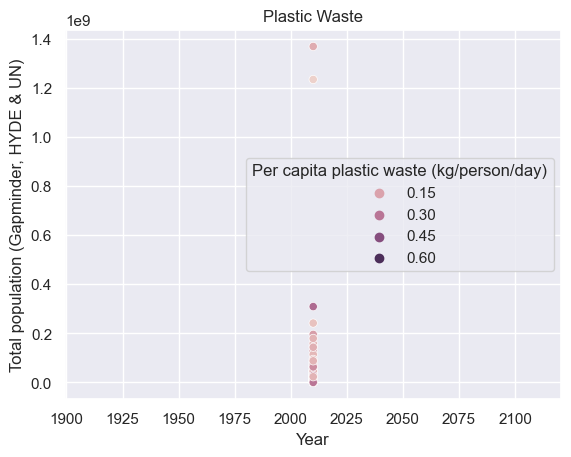

In [19]:
sns.scatterplot(x = GB_df["Year"], y = GB_df["Total population (Gapminder, HYDE & UN)"],
                hue = GB_df["Per capita plastic waste (kg/person/day)"], data = GB_df).set(title = "Plastic Waste");

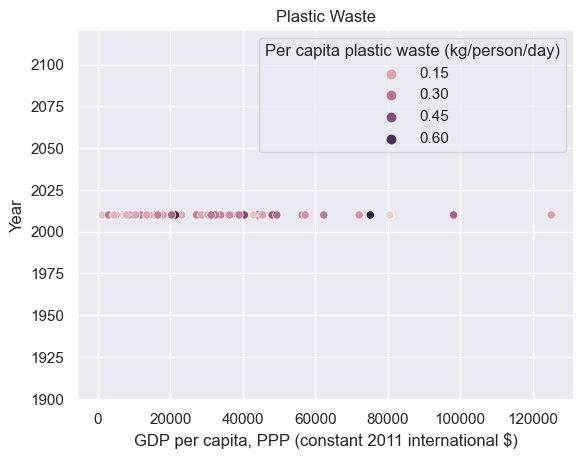

In [20]:
sns.scatterplot(x = GB_df["GDP per capita, PPP (constant 2011 international $)"], y = GB_df["Year"],
                hue = GB_df["Per capita plastic waste (kg/person/day)"], data = GB_df).set(title = "Plastic Waste");

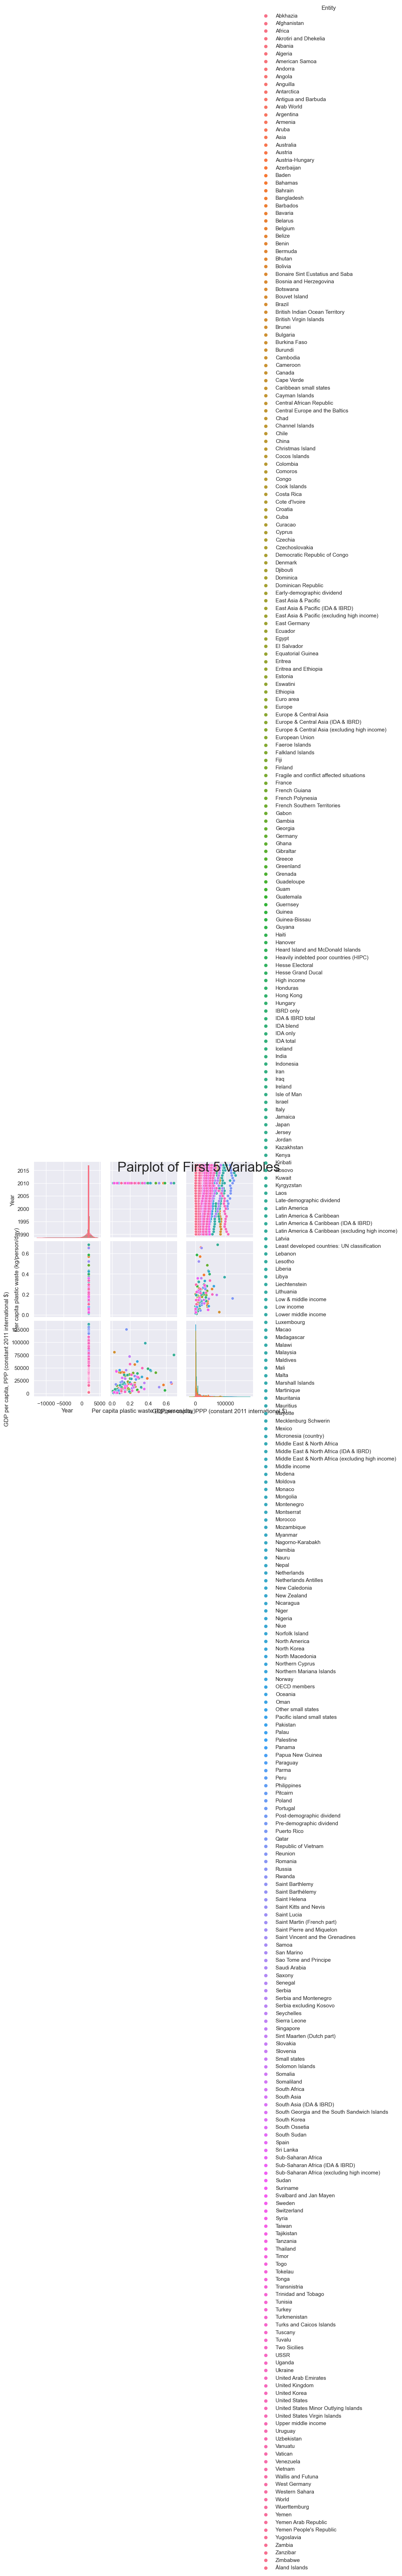

In [21]:
variables = GB_df.iloc[:, :5]
variables["Entity"] = GB_df["Entity"]
sns.pairplot(variables, hue = "Entity")
plt.suptitle("Pairplot of First 5 Variables", fontsize = 28)
plt.show()

In [ ]:
for i in GB_df.select_dtypes(include="number").columns:
    sns.histplot(data=GB_df, x=i)
    plt.show()